In [1]:
from time import sleep
import numpy as np
import urllib3
import matplotlib
from numpy import append
import config
import vectorbt as vbt
import pandas as pd
import pandas_ta as ta
from datetime import datetime
from alpaca_trade_api.rest import REST
import gym
import gym_anytrading
from tensorflow.keras.models import load_model

from stable_baselines import ACKTR
from stable_baselines.common.evaluation import evaluate_policy

c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\90507\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\90507\AppD

60

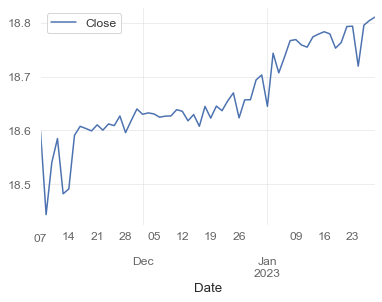

In [2]:
data = vbt.YFData.download(symbols= 'TRY=X', period="60d")
X=data.data['TRY=X'].index
Y=data.data['TRY=X'].Close
data.data['TRY=X'].reset_index().plot(x='Date', y='Close')
X=data.data['TRY=X']
tryDF = pd.DataFrame(X['Close'])
tryDF.size

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
testingSet = pd.DataFrame(tryDF)
testing_set_scaled = sc.fit_transform(testingSet)
testing_set_scaled

array([[0.42584218],
       [0.        ],
       [0.26330334],
       [0.38482756],
       [0.10545873],
       [0.12992907],
       [0.40136663],
       [0.44665914],
       [0.4356886 ],
       [0.42346384],
       [0.45410641],
       [0.42728375],
       [0.45866532],
       [0.45020323],
       [0.4987744 ],
       [0.41481439],
       [0.47612555],
       [0.53451712],
       [0.50750191],
       [0.5146005 ],
       [0.50941187],
       [0.49276871],
       [0.49822796],
       [0.4992636 ],
       [0.53078048],
       [0.52281279],
       [0.47449142],
       [0.5061384 ],
       [0.44685169],
       [0.54734037],
       [0.48813173],
       [0.54897971],
       [0.52573237],
       [0.57517265],
       [0.61563562],
       [0.48957851],
       [0.58062669],
       [0.58117314],
       [0.68122987],
       [0.70665778],
       [0.54769426],
       [0.8166442 ],
       [0.71724321],
       [0.79659226],
       [0.8802192 ],
       [0.8853766 ],
       [0.85811679],
       [0.847

In [4]:
inputs = tryDF[0:].values     #lstm input shape edit
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = np.array(inputs)
X_test = np.reshape(X_test, (int(X_test.size/60), 60,1))

C:\Users\90507\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
try_model = load_model('Lira_BOT.bot')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
predicted_close_value = np.array([])
#predicted_close_value = sol_model.predict(X_test)
for i in range(0,7):
    predicted_close_value = try_model.predict(X_test)
    X_test = np.append(X_test,predicted_close_value)
    X_test = X_test[1:]
    X_test = np.reshape(X_test, (1,60,1))

In [7]:
predicted_close_value = sc.inverse_transform(X_test[0][-7:])

In [8]:
predicted_close_value = pd.DataFrame(predicted_close_value)
predicted_close_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
dtypes: float64(1)
memory usage: 184.0 bytes


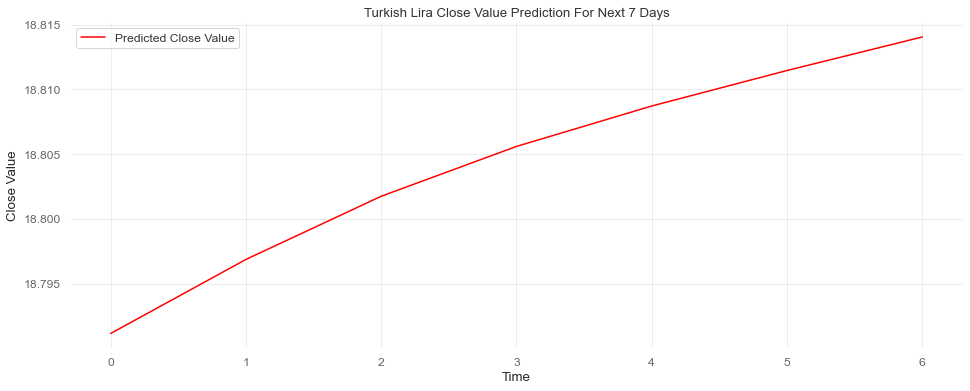

In [9]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(6)
plt.plot(predicted_close_value, color='red', label='Predicted Close Value')
plt.title('Turkish Lira Close Value Prediction For Next 7 Days')
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.legend()
plt.show()

In [10]:
current_value_TRY = tryDF["Close"][-1]
next_week_TRY = np.array([])
for i in range(predicted_close_value.size):
    next_week_TRY = np.append(next_week_TRY, 100 * (predicted_close_value[0][i]-current_value_TRY) / current_value_TRY)
    current_value_TRY = predicted_close_value[0][i]
print(next_week_TRY)

[-0.10285082  0.03042866  0.02596715  0.02046573  0.0166017   0.01458456
  0.01376606]


In [11]:
import pickle

%store -r next_week_SOL
all_next_week = np.append(next_week_TRY,next_week_SOL)
all_next_week = np.reshape(all_next_week,(2,7))

with open('Next_Week_Predictions.pickle', 'wb') as f:
    pickle.dump(all_next_week, f)

In [12]:
file = open('Next_Week_Predictions.pickle', 'rb')
temp = pickle.load(file)
print(temp)

[[-0.10285082  0.03042866  0.02596715  0.02046573  0.0166017   0.01458456
   0.01376606]
 [-0.18905597 -0.13751699 -0.09681745 -0.06050942 -0.04110869 -0.03469153
  -0.03551568]]
